<CENTER><img src="images/logos.png" style="width:50%"></CENTER>

# A more difficult notebook in python  <a name="c"></a>

# $Z^0$ decays: finding the $Z^0$ boson mass!

### For an introduction to the ideas behind $Z^0$ finding, click <a href="Events/ZPath.pdf"> here</a>.

**The following analysis is searching for events where one (or two) [$Z^0$ bosons](https://en.wikipedia.org/wiki/W_and_Z_bosons) decay to two (or four) leptons of same flavour and opposite charge.**

As you might recall, leptons can be either electrons or muons, or their antiparticles. **Flavour** just means whether a particle is an (anti)electron or a (anti)muon. We know the $Z^0$ boson has charge zero, so, to conserve charge, the two leptons to which a single $Z^0$ decays must have **opposite charges**.

We also say that electron number and muon number must be conserved in this reaction.

* Electrons and antielectrons (positrons) have $+1$ and $-1$ respectively as their electron numbers, and have zero muon number.
* Muons and antimuons have $+1$ and $-1$ respectively as their muon numbers, and have zero electron number.
* Z^0$ has zero electron number and muon number.

Therefore, we see that if the $Z^0$ decays to two leptons, **they must be the same flavour**. 

We will look at the two-lepton decay first, and then you will have a go with the four-lepton case. First, though, we need to think about how we talk about decays in particle physcis.

**Contents:**
- [Feynman diagrams and Lorentz vectors](#1.)
- [How to use TLorentzVectors in Python](#2.)
- [Decays](#3.)
- [Cuts](#4.)
- [Over to you! To four leptons](#5.)
- [Real experiments](#6.)
- [Extension exercises](#7.)

## Feynman diagrams and Lorentz vectors <a name="1."></a>

We show decays with a [Feynman diagram](https://en.wikipedia.org/wiki/Feynman_diagram), which (for our purposes) we can think of a diagram of the interaction itself, where time goes from left to right. This is not strictly true, but it will suffice for now.

Each particle is a single line, and you can think of the vertical axis as space, so here we have an electron $e^-$ and its antiparticle, a positron, $e^+$, moving towards each other in space, annihilating each other, producing a photon ($\gamma$) and then that photon decays to two muons.

<CENTER><img src="./images/electronpositronannihilation.png" style="width:50%"></CENTER>


You may have noticed that the arrow for the positron is the wrong way round for the process which we have just described. By convention, the arrow for an antiparticle is reversed. (If you really want to know, it's because an antiparticle can be thought of as a particle moving backwards in time - something which we will not go into here).

Now, we say that energy and momentum must be conserved at each vertex in the Feynman diagram. $\vec{p}^\mathrm{tot}_\mathrm{before} = \vec{p}^\mathrm{tot}_\mathrm{after}$, and $E^\mathrm{tot}_\mathrm{before} =E^\mathrm{tot}_\mathrm{after}$.

A concise way of writing that is with a **Lorentz vector**, or 4-vector, which neatly packages together energy and momentum.

$$P^\mu = (E/c, \vec{p}) = (E/c, p_x, p_y, p_z)$$

The $\mu$ is just an arbitrary index, starting at zero, so $P^0 = E/c$, $P^1 = p_1 = p_x$, $P^2 = p_2 = p_y$, $P^3 = p_3 = p_z$. However, we make sure to write it to make it clear that this is no ordinary spatial vector that we're dealing with.

We can add and subtract these four-vectors like any other vector with four components:

$$P^\nu_{e^+} + P^\nu_{e^-} = (E_{e^+} + E_{e^-}, \vec{p}_{e^+} + \vec{p}_{e^-}) = P^\nu_\mathrm{tot}$$

Since all of its components must be conserved, $P^\mu_\mathrm{before} = P^\mu_\mathrm{after}$ at every vertex.

For the electron-positron annihilation above, conserving 4-momentum at each vertex, we have:

$$P^\nu_{e^+} + P^\nu_{e^-} = P^\nu_\gamma\text{, and } P^\nu_\gamma =  P^\nu_{\mu^+} +  P^\nu_{\mu^-}$$

More interestingly, if you remember the most famous equation in Physics, $E=mc^2$. That's only true if an object is stationary. If it's not, you have $E^2 = m^2 c^4 + p^2 c^2$. The $m$ in this is called its invariant mass. Clearly, you can quite easily construct $m$ from the components of the 4-vector. 

$$m = \frac{1}{c^2}\sqrt{E^2 - p^2 c^2}$$

###  Units

One last thing - we can just pick a system of units in which $c = 1$. We basically do this by redefining what our SI units are. Imagine that we measured distances in pirate-wizards, which we define to be equal to $299 792 458$ metres. Let's keep measuring times in seconds, though. You, then are about $6\times 10^{-9}$ pirate-wizards tall.

You may have noticed the specific value we picked for a pirate-wizard. 

**What does that mean the speed of light is, measured in our new unit system?**

<details>
    <summary>Click here for answer: </summary>
    It's exactly $1$ pirate-wizard per second!
</details>

Let's then define the unit of energy as 1 GeV - one gigaelectronvolt. What does that make our unit of mass? Now, we know that the units still have to match up dimensionally, and we know that $1 kg = 1 Joule /c^2$, so let's measure mass in $eV /c^2$. Similarly, let's measure momentum in $eV/c$.

So, we can measure some particle A to have a mass of $3 GeV/c^2$, an energy of $5 GeV/c^2$, and a momentum of $4 GeV/c$. The advantage of setting $c=1$ is that we can throw out all of those extra $c$s. That means we can measure everything in units  of $GeV$! So, our particle A just has $m=3$, $E=5$, and $p=4$. Of course, you can't do dimensional analysis any more, but it makes a lot of things easier - trust me. For one thing, our mass equation turns out to be pretty simple: $m = \sqrt{E^2 - p^2}$. 

**Check if particle A satisfies this!**

[Return to contents](#c)

---

## How to use TLorentzVectors in Python <a name="2."></a>
 
Since we're using code, we're going to have a pretty simple function that takes our Lorentz Vector and spits out the rest mass of that Lorentz vector.

Thankfully, the dirty work has been done for you already. If you have a TLorentzVector variable called `particle1`, and you want its invariant mass, just do this:

`particle1.M()`

First of all - like we did it in the first notebook - uproot is imported to read the files in the .root data format, and to give us the relevant libraries.

In [19]:
import uproot

We've written a module that generates Lorentz vectors, so let's import it.

In [20]:
from TLorentzVector import TLorentzVector

Now, let's declare two TLorentzVectors. We do this by declaring two variables, and then saying that each one is a `TLorentzVector` from the library `ROOT`.

In [21]:
particle1 = TLorentzVector()
particle2 = TLorentzVector()

Of course, they're just empty vectors at the moment. Let's set them with values. Notice the way this is written, with the E coming last.

_Try editing the code to print the energy $E$._

In [ ]:
particle1.SetPxPyPzE(0, 0, 0, 1)
print(particle1.Px())
print(particle1.Py())
print(particle1.Pz())
print(particle1.P())
####
particle1_energy = 0 #FIX ME!
print("The energy is ", particle1_energy, "MeV") 
particle1_mass = 0 #FIX ME!
print("The energy is ", particle1_mass, "MeV/c^2")

As a reminder from your event displays, the detector gives us momentum in an odd way. Place yourself in spherical coordinates, $(r,\theta,\phi)$, with the collision point at $r=0$, and the direction of the beam (the beam axis) along $\theta =0$.

<figure>
  <center>  <img src="images/CMSangles.png" alt="image missing" style="height: 300px" />
     <figcaption>Image 11: Quantities $\theta$, $\eta$ and $\phi$ in the ATLAS detector.</figcaption> </center>
</figure>

In our data files, we get given the following three quantities for each lepton.

* $p_T$: the amount of momentum perpendicular to the direction of the beam, called the **transverse momentum**.
* $\eta$: the rapidity, which is essentially a function of the polar angle $\theta$.
* $\phi$: the azimuthal angle - direction of that perpendicular component of momentum (in radians, of course). This is just like the azimuthal angle in spherical coordinates.

**Does this uniquely determine (three-)momentum?**

<details>
    <summary>Click here for answer: </summary>
    Yes! We are measuring a three-dimensional momentum, and have been given three mutually-exclusive ('orthogonal') coordinates.
</details>

So, we can also define the components of $P^\mu = (E, \vec{p})$ like this, using the function `.SetPtEtaPhiE(pt, eta, phi, E)`.

So, if $p_T = 1 GeV$, the rapidity $\eta = 1.0$, and the transverse component of momentum came off at an azimuthal angle $\phi = \pi/2$, and its overall energy is $5 GeV$, we can build the Lorentz vector as follows.

In [22]:
from numpy import pi # We need to import the value of pi from the numpy library
particle2.SetPtEtaPhiE(1, 1, pi/2, 5)
particle2.M()

4.755933363122131

Finally, you can add four-vectors in Python just like you can mathematically. if you want to define $P^\mu_3 = P^\mu_1 + P^\mu_2$, it is as easy as `particle 3 = particle1 + particle2`.

In [ ]:
# Add the particle 1 and particle2 four-vectors together, 
# and print out the invariant mass of the two-particle system





[Return to contents](#c)

---

## Decays <a name="3."></a>

Back to the decays, then.

We want to find $Z^0$ bosons, but they don't live long enough to actually see with the detector itself. Instead, we have to **reconstruct** them from their decay products. We don't particularly mind where the $Z^0$s themselves come from. All you need to know here is that each time the LHC smashes two protons together, they produce lots and lots of particles, some of which are $Z^0$s.


From theory, we know that there are two main decay routes. The first is to two leptons, and the second is to four leptons.


### To two leptons

The first option is that a random Z that emerges from the collision aftermath in the LHC (we don't care how) can decay directly to two leptons of the same type, but opposite charge. This means an electron and an antielectron, a muon and an antimuon. The decay happens at the vertex below, marked by a dot. We denote a lepton by the letter $\ell$. Conventionally, antiparticles are shown with a bar on top, so an antilepton is $\bar{\ell}$.

<CENTER><img src="./images/Z_to_ll.png" style="width:30%"></CENTER>

*Using what you know above, write down the equation of conservation of the energy-momentum four-vector for the above decay.*

The ATLAS detector can measure the momentum and energy of leptons coming out of decays, and you can access that information quite simply. It also measures the charge and flavour of each lepton (whether its a muon/antimuon, or electron/antielectron).

We mentioned earlier that each smash makes lots of particles. That's true - in fact, it makes so many that we can't actually store all the records of what happened, even on some of the biggest data storage facilities in the world. 

Instead, we use what is called a trigger. The trigger here was us seeing **exactly one high energy lepton** and **one jet with a large radius** (don't worry about what that is for now), so all of our data will contain at least those two things, as well as a bunch of other particles.


Next we have to open the data that we want to analyze. As described earlier, the data is stored in a `*.root` file.  The TTree is also called *mini* so we'll open the TTree directly.

In [23]:
f = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root:mini") ## 13 TeV sample

We'll need a little more data this time.  However, we don't have to extract this data one array at a time - we can actually extract it all at once, as seen below.

In [24]:
data = f.arrays(["lep_n", "lep_charge", "lep_type", "lep_pt", "lep_eta", "lep_phi", "lep_E"])

As for why we need more data this time, you'll see soon enough.  For now, let's make our template histogram.

In [25]:
import hist
from hist import Hist

hist1 = Hist(hist.axis.Regular(30,40,140, label = "Mass (GeV)"))

It is now time to fill our above defined histogram with the masses. To do that, we need to reconstruct our $Z^0$ boson Lorentz vector. We do this by narrowing down all our events to those that have two leptons of opposite charge and the same flavour, then building `TLorentzVector`s for each of them, and then adding them together. From your equation above, that would give the Lorentz vector of the parent particle - the $Z^0$ (we hope). Once we have that, the invariant mass can come from `Z0_boson_Lorentz_vector.M()`.

**The process of narrowing down the number of candidates by imposing a condition is called making a cut**.

[Return to contents](#c)

---

## Cuts <a name="4."></a>

Why do we make cuts? Remember that there are lots of other particles flying around, and sometimes you'll just have two electrons of the same charge and same flavour, that have nothing to do with each other, that we measure. Obviously, they won't reconstruct to a $Z^0$ boson.

Therefore, we need to not count these events based on that, so we **cut** on the fact that there are two leptons of the same flavour, and then cut again on the fact that those two leptons are oppositely charged.

**You may have spotted an issue here - what if we have two random unassociated electrons of the same flavour and opposite charge? We can't eliminate those.**

One thing you might want to take note of is that the detector gives us energies and momenta in units of $MeV$! This means that when building our LorentzVectors, we have to divide by a thousand, so that our LorentzVector has an overall unit of $GeV$.

### Make sure you read through the code - particularly the comments! You'll be doing this yourself shortly.

- Cuts
- T vector
- Invariant mass

The $Z^0$ boson decays through two channels:
- $Z^0 \rightarrow l^+ \; l^-$
- $Z^0 \rightarrow l^+ \; l^- \; + \; l^+ \; l^-$

where $l^+ \; l^-$ is a lepton-antilepton pair with the constituent leptons being of the same family.  This means the options are $e^+ \; e^-$, $\mu^+ \; \mu^-$, $\tau^+ \; \tau^-$.  $\tau$ leptons are rarely produced, so we will generally be looking for $e^+ \; e^-$ and $\mu^+ \; \mu^-$ pairs.

This means we can deduce the following for a *pass event*:
- There must be at least 2 leptons produced by the event - see by observation
- Must be of opposite charge, or equivalently of *unequal charge* (since only two possibilities for charge)
- Must be of the same family - see by specification

In [26]:
leadLepton  = TLorentzVector()
trailLepton = TLorentzVector()

for i in range(1000): # Runs best with 1,000 datapoints
    lep_n = data["lep_n"][i] # Number of leptons
    # Cut 1: At least 2 leptons in the event
    if lep_n >= 2:
        lep_charge = data["lep_charge"][i] # Charge of leptons
        # Cut 2: Leptons with opposite charge
        if lep_charge[0] != lep_charge[1]:
            lep_type = data["lep_type"][i] # Type of lepton.  Gives back a number that represents the lepton type
            # Cut 3: Leptons of the same family
            if lep_type[0] == lep_type[1]:
                
                lep_pt = data["lep_pt"][i] # Transverse momentum
                lep_eta = data["lep_eta"][i]
                lep_phi = data["lep_phi"][i]
                lep_E = data["lep_E"][i]
                
                leadLepton.SetPtEtaPhiE(lep_pt[0]/1000., lep_eta[0], lep_phi[0], lep_E[0]/1000.)
                trailLepton.SetPtEtaPhiE(lep_pt[1]/1000., lep_eta[1], lep_phi[1], lep_E[1]/1000.)
                
                Z0_boson = leadLepton + trailLepton
                
                hist1.fill(Z0_boson.M())

After filling the histogram we want to see the results of the analysis. We import `matplotlib` and get plotting!

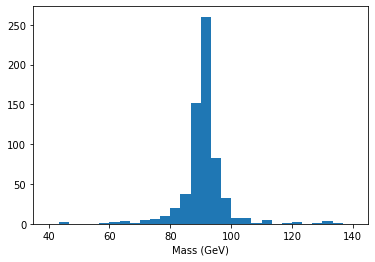

In [29]:
import matplotlib.pyplot as plt

hist1.plot(histtype = "fill")
plt.show()

**Done**

Well done!

If everything went well, you have just reconstructed the $Z^0$ boson!

*Interpret this graph - what is the mass of this boson?*

<details>
    <summary>Answer: </summary>
        That's right - 90 GeV!
</details>

[Return to contents](#c)

---

## Over to you! To four leptons <a name="5."></a>

We have a theory that a more complicated interaction occurs between a quark, $q$, and an antiquark, $\bar{q}$. We think that they come towards each other, and quickly exchange a particle (the vertical line below). When this happens, the quark and antiquarks turn into $Z^0$s, which then decay themselves, exactly as in the last analysis. Notice that the part of the Feynman diagram within the box is exactly the same as the diagram above!

<CENTER><img src="images/2z4l_boxed.png" style="width:30%"></CENTER>

Does this decay really happen? Let's find out, using some new data. We are going to apply some cuts then see if the plots that we produce still make sense. We are not trying to just confirm what the mass of the $Z^0$ boson is, as we did that above - we just want to see if this kind of decay can happen, and the best way to do that is see if the plots look like what we expect them to look like!

*We can't reconstruct the 4-momenta of the quarks, or the exchanged particle - why?*

Therefore, we just look at the final state. We are going to work out the masses of both $Z^0$s in these events.

We have a lot more particles to keep track of this time, so the event will be less clean.

Tips:

* You will need to add some cuts: what will these cuts be?
* How do you pick which lepton came from which $Z^0$. Can you tell at all, or do you try each possible way?
* How many ways are there of reconstructing wrongly? How can you tell if you've reconstructed correctly - what else can you cut on?

__Remember, there are two sub-decays here. You could try checking if one of them is a good decay (a real $Z^0$ decaying to two leptons), and then only plotting the mass of the other one if it is.__


### First load your tree and set up you histogram canvas

#### File and plot details

- Name: `https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/MC/mc_363490.llll.4lep.root`
- TTree name: `mini
hist1 = Hist(hist.axis.Regular(30,40,140, label = "Mass (GeV)"))
- Histogram:
    - name: `"hist_Zl4"`
    - nBins: 30
    - min: 40
    - max: 140
    - label: "Mass (GeV)"
    - title: "Mass of the Z boson from 4-lepton events"

In [ ]:
# Exactly the same as before, using the details in the cell below
# We've renamed the variables to avoid overwriting the old ones, so that you can run them again.

f_4l = #### ## 4 lepton 13 TeV sample
tree = ####
tree.show()

hist_Zl4 = ####

### Next, perform your analysis

In [ ]:
# Declare four TLorentzVectors
firstLepton  = ####
secondLepton = ####
thirdLepton = ####
fourthLepton = ####

# Now, iterate through each event in the tree!
for #### in ####:
    # Cut #1: At least 4 leptons in the event. lep_n  is the number of them.
    if #### >= 4:
        lep_charge = tree["lep_charge"][i]
        # Cut #2: First two leptons must have opposite charge.
        if (lep_charge[0] != ####):
            
            # Cut #3: First two leptons must have same flavour
            lep_type = tree["lep_type"][i]
            if (lep_type[0] == ####):
                firstLepton.SetPtEtaPhiE(lep_pt[0]/1000., lep_eta[0], lep_phi[0], lep_E[0]/1000.)
                secondLepton.SetPtEtaPhiE(lep_pt[1]/1000., lep_eta[1], lep_phi[1], lep_E[1]/1000.)
                
                # Could we add a cut in here? 

                # Now we look at the second decay - note that we have assumed that the first two
                # Cut #4: Second two leptons opposite charge
                if ####:

                    # Cut #5: Second two leptons same flavour
                    if ####:
                        # By now we should only have paricles that look right remaining.

                        # Let's set the components of a TLorentzVector for each lepton. Notice that the energy and momenta are given in MeV!
                        thirdLepton.SetPtEtaPhiE(lep_pt[2]/1000., lep_eta[2], lep_phi[2], lep_E[2]/1000.)
                        fourthLepton.SetPtEtaPhiE(lep_pt[3]/1000., lep_eta[3], lep_phi[3], lep_E[3]/1000.)
                        
                        # Now, reconstruct the Z0 boson Lorentz vectors! 
                        Z0_boson1 = #### + ####
                        Z0_boson2 = #### + ####

                        # And chuck this particular value into the histogram.
                        hist_Zl4.fill(Z0_boson1.M())
                        hist_Zl4.fill(Z0_boson2.M())

#### Some hints to help you - Click to reveal

<details>
    <summary>a) Declare four TLorentzVectors. </summary>

    firstLepton  = TLorentzVector()
    secondLepton = TLorentzVector()
    thirdLepton  = TLorentzVector()
    fourthLepton = TLorentzVector()
</details>

<details>
    <summary> b) Now, iterate through each event in the tree </summary>
    
    for i in range(1,000):
</details>

<details>
    <summary>c) Cut #1: At least 4 leptons in the event. </summary>
    
    if lep_n >= 4:
</details>

<details>
    <summary>d) Cut #2: First two leptons must have opposite charge. </summary>
    
    if (lep_charge[0] != lep_charge[1]):
</details>

<details>
    <summary>e) Cut #3: First two leptons must have same flavour. </summary>
    
    if ( lep_type[0] == lep_type[1]):
</details>

<details>
    <summary>f) Cut #4 and Cut #5: Second two leptons opposite charge, same flavour. </summary>
    
    if (lep_charge[2] != lep_charge[3]):
    if (lep_type[2] == lep_type[3]):
</details>

<details>
    <summary>g) Now, reconstruct the Z0 boson Lorentz vectors. </summary>
    
    Z0_boson1 = firstLepton + secondLepton
    Z0_boson2 = thirdLepton + fourthLepton
</details>

<details>
    <summary> --> If you're REALLY stuck... the full solution: </summary>

    # Declare four TLorentzVectors

    firstLepton  = TLorentzVector()
    secondLepton = TLorentzVector()
    thirdLepton = TLorentzVector()
    fourthLepton = TLorentzVector()


    # Now, iterate through each event in the tree!

    for i in range(1,000):
    
        # Cut #1: At least 4 leptons in the event. lep_n  is the number of them.
        lep_n = tree["lep_n"][i]
        if lep_n >= 4:
        
        
        # Cut #2: First two leptons must have opposite charge.
            lep_charge = tree["lep_charge"][i]
            if (lep_charge[0] != lep_charge[1]):
            
            # Cut #3: First two leptons must have same flavour
            lep_type = tree["lep_type"][i]
            if (lep_type[0] == lep_type[1]):
                lep_pt = tree["lep_pt"][i]
                lep_eta = tree["lep_eta"][i]
                lep_phi = tree["lep_phi"][i]
                lep_E = tree["lep_E"][i]
                
                firstLepton.SetPtEtaPhiE(lep_pt[0]/1000., lep_eta[0], lep_phi[0], lep_E[0]/1000.)
                secondLepton.SetPtEtaPhiE(lep_pt[1]/1000., lep_eta[1], lep_phi[1], lep_E[1]/1000.)
                
                # Could we add a cut in here? 

                # Now we look at the second decay - note that we have assumed that the first two
                # Cut #4: Second two leptons opposite charge
                if (lep_charge[2] != lep_charge[3]):

                    # Cut #5:
                    if (lep_type[2] == lep_type[3]):
                        # By now we should only have paricles that look right remaining.

                        # Let's set the components of a TLorentzVector for each lepton. Notice that the energy and momenta are given in MeV!
                        thirdLepton.SetPtEtaPhiE(lep_pt[2]/1000., lep_eta[2], lep_phi[2], lep_E[2]/1000.)
                        fourthLepton.SetPtEtaPhiE(lep_pt[3]/1000., lep_eta[3], lep_phi[3], lep_E[3]/1000.)
                        
                        # Now, reconstruct the Z0 boson Lorentz vector! 
                        Z0_boson1 = firstLepton + secondLepton
                        Z0_boson2 = thirdLepton + fourthLepton

                        # And chuck this particular value into the histogram.
                        hist_Zl4.fill(Z0_boson1.M())
                        hist_Zl4.fill(Z0_boson2.M()) 
</details>

### Finally, plot your results

In [ ]:
hist_ZL4.plot()
plt.show()

[Return to contents](#c)

---

# Real experiments <a name="c"></a>

Now, real experiments are not run like this. You may have noticed that although we mentioned a theoretical decay, all we gave you was a diagram. You had no real way of checking whether or not the decay that the theory described is actually what happens in reality, other than saying that the plots look roughly about right.

So, one more thing. Surprise! The data you have been analysing here isn't really data at all - it is in fact a simulated sample of $Z^0 \rightarrow \ell\bar{\ell}$ and $Z^0 Z^0 \rightarrow \ell\bar{\ell}\ell\bar{\ell}$ decays in the ATLAS detector, based on the Standard Model.

The way we perform actual experiments, is that we write some analysis code, just like above, and then run the exact same code on a Standard Model simulation and on the real data that gets spat out by the detector. The extent to which the two agree then tells us how close our model is to reality.

Here’s an example of what happens if we compare the simulation with what we see at the LHC. The black dots are the real data, and the bars are real data. You may notice that it looks pretty close to what we had before - that's because there are lots and lots of Z decays that happen in the detector. If you looked closely enough, you would be able to tell that there are other colours stacked there in the histogram, but the slices are so thin that you can't see them.

<CENTER><img src="images/Zinvmass-ATLASOD8TeV.png" style="width:50%"></CENTER>


[Return to contents](#c)

---

## Extension exercises <a name="7."></a>

a) The way we performed our 4 lepton analysis was not optimal - we ended up selecting many fewer events than actually happened.

- What was the problem with our analysis? 

- Can you think of a better way? Redo the analysis your way and compare the results

<details>
    <summary>Click for a hint: </summary>
    In our version of the analysis we only kept an event if its first two leptons looked like one Z-boson, and its second two leptons looked like another. Is this the only combination we could have chosen?
</details>

b) An example of a file with real data events containing four leptons is `"https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_A.4lep.root` (with more available in that folder).

- Choose one of the analyses above ($Z\rightarrow ll$ or $ZZ\rightarrow llll$) and repeat using real data instead of simulation
- Do your plots look the same?

c) To perform our analysis, we imposed some basic cuts to try select good Z boson candidates, however, in practice real measurements impose more! 

- Look at the branches available in your TTrees, and their explanation in the [ATLAS Open Data Documentation](http://opendata.atlas.cern/release/2020/documentation/datasets/intro.html) to try come up with some more cuts.
- Repeat the analysis and compare your plots:
    - How are they different?
    - Which one would be considered a 'better measurement' and why?

[Return to contents](#c)

---